University of Zagreb, Faculty of Electrical Engineering and Computing

# Introduction to Data Science Course Project
## Malignant and Benign Breast Cancer Classification using Machine Learning Algorithms

#### Fani Sentinella-Jerbić, 2021

---

This project's aim is to replicate a data science themed scientific article using a Jupyter notebook. I will be replicating the following article:

S. Ara, A. Das and A. Dey, _Malignant and Benign Breast Cancer Classification using Machine Learning Algorithms_, 2021 International Conference on Artificial Intelligence (ICAI), 2021, pp. 97-101, doi: 10.1109/ICAI52203.2021.9445249.


In [31]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn')

### About the article

#### Research type classification:
- according to purpose: **applied** - uses known methods on new problems, doesn't answer any general questions in the field of artificial science nor does it introduce any new methods
- according to information origin: **secondary** - uses dataset provided by another institution
- according to time: **cross-sectional study** - made from an existing dataset during the International Conference on Artificial Intelligence in Islamabad
- according to method of gathering: **documentary** - uses existing data for the analysis, doesn't collect any new data
- according to data type: **quantitative** - all features have numerical values which are then used to compute the predictions
- according to degree of manipulation: **observational** - the data was collected from real patients already having the breast cancer
- according to depth of conclusion: **correlational** - tries to determine a model which predicts if a person has benign or malignant breast cancer based on the collected features
- according to type of conclusion: **deductive** - some things can be predicted by ML algorithms and that is what the authors of this article tried to do for breast cancer classification


#### Method of information retrieval:

Authors used an existing dataset provided by the University of Wisconsin Hospitals and donated by Nick Street in November 1995.


#### Research ethics:

The article was made and published as a part of the International Conference on Artificial Intelligence in Islamabad which is under sponsorship of IEEE. This leads me to believe it is published legally and with a certain level of academic dignity. The research did not include dealing with patients since they used a pre-existing dataset so I believe they caused minimum risk of harm to society. 

However, the article contains some logical issues in interpreting graphical data (described further in this notebook) so one could argue that the academic dignity of the article is questionable. Also, the article could have given more academic credit to the authors of the dataset which wanted certain information to be provided when used in research (can be seen at the end of this notebook). 

### Descriptive analysis
The dataset used is a special dataset called "Wisconsin Diagnostic Breast Cancer (WDBC)". It consists of 357 benign and 212 malignant cancer samples, as seen in the barchart below. 

In [32]:
from sklearn import datasets
data = datasets.load_breast_cancer()

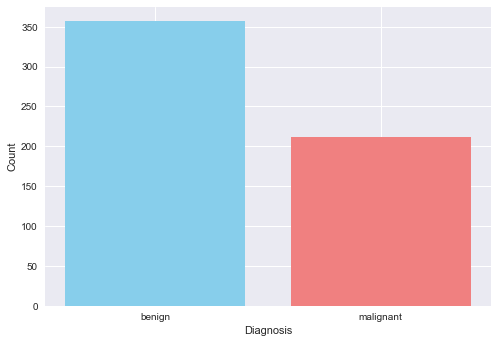

In [33]:
cnt = np.bincount(data.target)
plt.bar(data.target_names[::-1], cnt[::-1], color=['skyblue', 'lightcoral'])
plt.xlabel("Diagnosis")
plt.ylabel("Count")
plt.show()

It contains calculated measures such as **mean**, **standard error** and **the worst (largest) value** of different parameters determined by microscopic analysis on the breast tissue. The tissue is collected from a patient through *Fine Needle Aspiration* biopsy procedure. 

In [34]:
# original samples
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Especially interesting are the mean values:

In [35]:
X_mean = X[['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness', 'mean compactness', 'mean concavity', 'mean concave points', 'mean symmetry', 'mean fractal dimension']]
X_mean.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440


Below we can see the counterplot of the mean radius. 

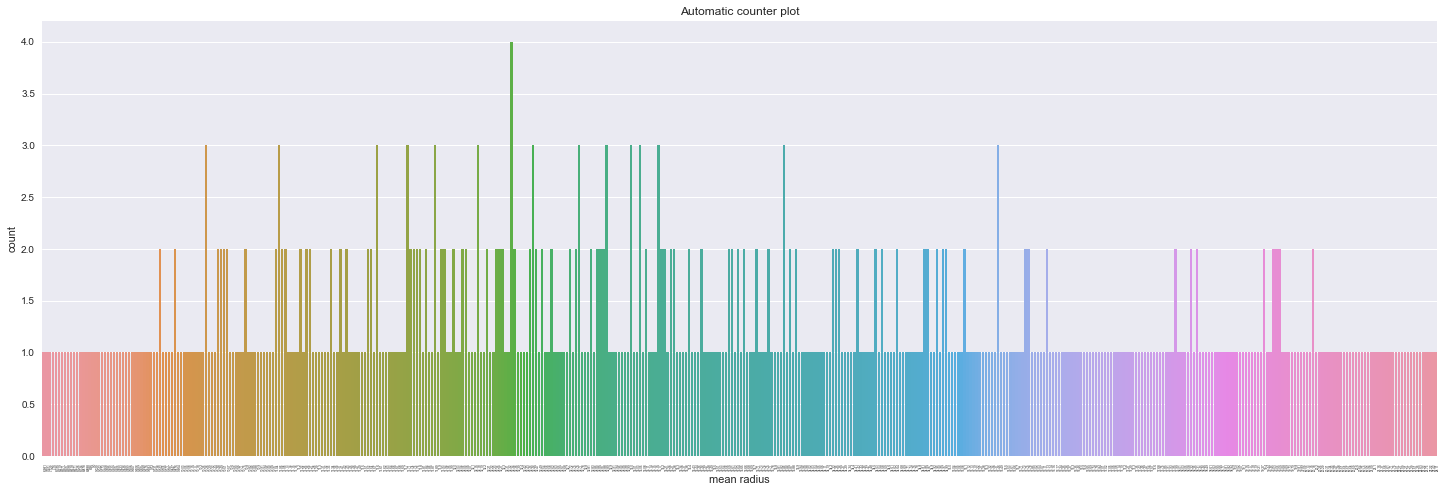

In [36]:
plt.figure(figsize = (25,8))
ax = sns.countplot(x=X['mean radius'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="left", fontsize=3)
plt.title('Automatic counter plot')
plt.show()

As the x-axis values are not recognizable, I have plotted another counterplot:

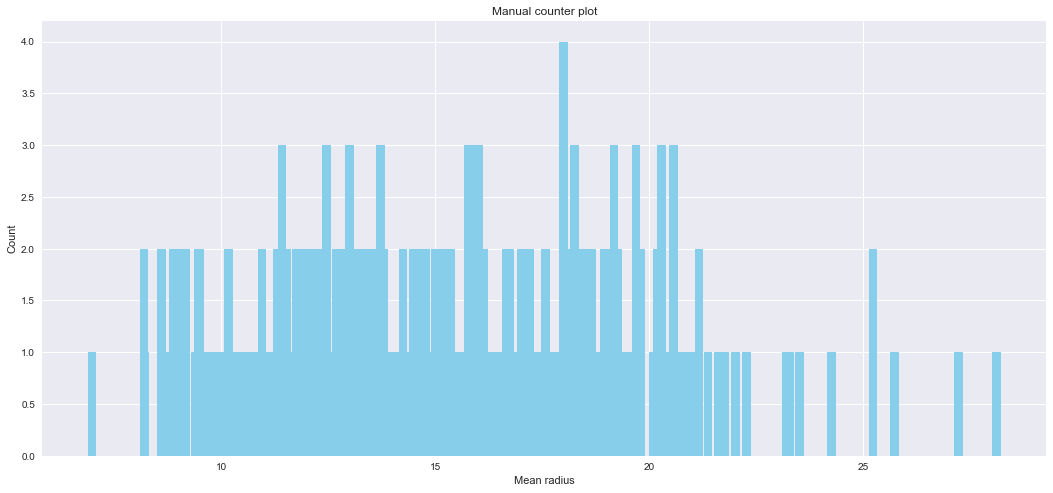

In [37]:
plt.figure(figsize = (18,8))
plt.bar(X['mean radius'].to_numpy()[:456], X['mean radius'].value_counts().to_numpy(), color='skyblue', width=0.2)
plt.title('Manual counter plot')
plt.xlabel('Mean radius')
plt.ylabel('Count')
plt.show()

The authors of the scientific paper have determined the following from the counter graph: *it can be observed that suspected patients not bearing cancer have a mean radius of around 1, whereas suspected patients bearing cancer have a 
mean radius of more than 1*, however I believe  the authors have made a mistake. The graph doesn't show the radius being around 1 for any of the patients. In fact, the smallest radius mean in the dataset is 6.981 and the mean of all radius means is 14.127292 (calculated in the previous section), which is far from 1. 

The proof of this can also be seen in the histogram below.

In [38]:
# labeled samples
D = pd.DataFrame(X.copy()) 
D.insert(0,'diagnosis', data.target)
D_mean = D[[ 'diagnosis', 'mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness', 'mean compactness', 'mean concavity', 'mean concave points', 'mean symmetry', 'mean fractal dimension']]

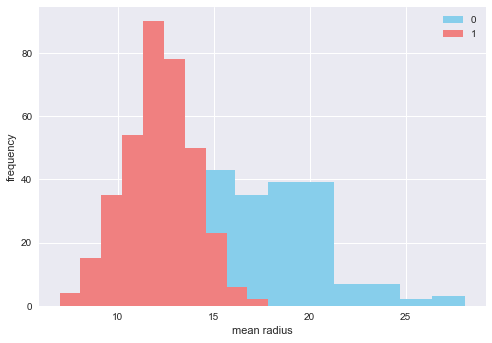

In [39]:
D['mean radius'][D['diagnosis'] == 0].hist(color='skyblue', label='0')
D['mean radius'][D['diagnosis'] == 1].hist(color='lightcoral', label='1')
plt.xlabel('mean radius')
plt.ylabel('frequency')
plt.legend()
plt.show()

### Train-test split

In [40]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

D_train = pd.DataFrame(X_train.copy()) 
D_train.insert(0,'diagnosis', y_train)
D_train_mean = X_train[['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness', 'mean compactness', 'mean concavity', 'mean concave points', 'mean symmetry', 'mean fractal dimension']]
D_train_mean = D_train[[ 'diagnosis', 'mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness', 'mean compactness', 'mean concavity', 'mean concave points', 'mean symmetry', 'mean fractal dimension']]

### Feature selection

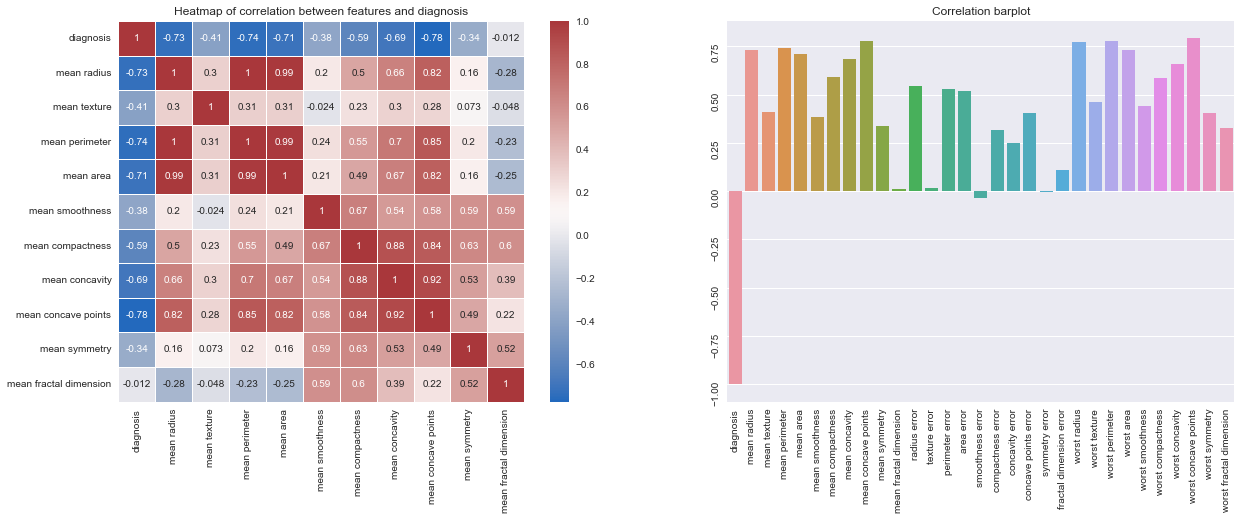

In [41]:
plt.figure(figsize = (20,7))
plt.subplot(1,2,1)
sns.heatmap(D_train_mean.corr(), annot=True, cmap="vlag", linewidths=.5)#, mask=np.triu(D_train_mean.corr()))
plt.title("Heatmap of correlation between features and diagnosis")
plt.subplot(1,2,2)
ax = sns.barplot(x=D_train.corrwith(D_train.diagnosis).index, y=-D_train.corrwith(D_train.diagnosis))
ax.tick_params(labelrotation = 90)
plt.title("Correlation barplot")
plt.show()

The authors of the article have determined they should remove mean fractal dimension, texture error and symmetry error. If I was a part of this research I would also pay attention to correlation between different features, not only the correlation with the label. However since the task was to replicate the article I shall follow their method:

In [42]:
columns = ['mean fractal dimension', 'texture error', 'symmetry error']
X_train = X_train.drop(columns, axis=1)
X_test = X_test.drop(columns, axis=1)

--- 

### Training and testing

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

sclr = StandardScaler()
X_train_s = sclr.fit_transform(X_train)
X_test_s = sclr.fit_transform(X_test)

#### Logistic regression


In [44]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
clf_lr = LogisticRegression()
clf_lr.fit(X_train_s, y_train)
lr_train = accuracy_score(y_train, clf_lr.predict(X_train_s))
lr_test = accuracy_score(y_test, clf_lr.predict(X_test_s))

print(f'Accuracy\nTrain set: {lr_train}\nTest set: {lr_test}')

Accuracy
Train set: 0.9882629107981221
Test set: 0.951048951048951


#### Support Vector Machine

In [45]:
from sklearn.svm import SVC

clf_svm = SVC()
clf_svm.fit(X_train_s, y_train)
svm_train = accuracy_score(y_train, clf_svm.predict(X_train_s))
svm_test = accuracy_score(y_test, clf_svm.predict(X_test_s))


print(f'Accuracy\nTrain set: {svm_train}\nTest set: {svm_test}')

Accuracy
Train set: 0.9859154929577465
Test set: 0.951048951048951


#### K-Nearest Neighbour

In [46]:
from sklearn.neighbors import KNeighborsClassifier
clf_knn = KNeighborsClassifier()
clf_knn.fit(X_train_s, y_train)
knn_train = accuracy_score(y_train, clf_knn.predict(X_train_s))
knn_test = accuracy_score(y_test, clf_knn.predict(X_test_s))

print(f'Accuracy\nTrain set: {knn_train}\nTest set: {knn_test}')

Accuracy
Train set: 0.9765258215962441
Test set: 0.965034965034965


#### Decision Tree

In [47]:
from sklearn.tree import DecisionTreeClassifier
#from sklearn import tree
clf_dt = DecisionTreeClassifier()
clf_dt.fit(X_train, y_train)
dt_train = accuracy_score(y_train, clf_dt.predict(X_train))
dt_test = accuracy_score(y_test, clf_dt.predict(X_test))
#plt.figure(figsize = (10,7))
#tree.plot_tree(clf_dt)

print(f'Accuracy\nTrain set: {dt_train}\nTest set: {dt_test}')

Accuracy
Train set: 1.0
Test set: 0.951048951048951


#### Naive Bayes

In [48]:
from sklearn.naive_bayes import GaussianNB
clf_nb = GaussianNB()
clf_nb.fit(X_train, y_train)
nb_train = accuracy_score(y_train, clf_nb.predict(X_train))
nb_test = accuracy_score(y_test, clf_nb.predict(X_test))

print(f'Accuracy\nTrain set: {nb_train}\nTest set: {nb_test}')

Accuracy
Train set: 0.931924882629108
Test set: 0.965034965034965


#### Random Forest

In [49]:
from sklearn.ensemble import RandomForestClassifier
clf_rf = RandomForestClassifier()
clf_rf.fit(X_train, y_train)
rf_train = accuracy_score(y_train, clf_rf.predict(X_train))
rf_test = accuracy_score(y_test, clf_rf.predict(X_test))

print(f'Accuracy\nTrain set: {rf_train}\nTest set: {rf_test}')

Accuracy
Train set: 1.0
Test set: 0.972027972027972


---

### Conclusion

In [56]:
print('alg | accuracy\n----+----------\nlr  | {:.1f}\nknn | {:.1f}\ndt  | {:.1f}\nnb  | {:.1f}\nrf  | {:.1f}\nsvm | {:.1f}\n'.format(
     lr_test*100, knn_test*100, dt_test*100, nb_test*100, rf_test*100, svm_test*100))

alg | accuracy
----+----------
lr  | 95.1
knn | 96.5
dt  | 95.1
nb  | 96.5
rf  | 97.2
svm | 95.1



### Acknowledgements
Special thanks to all creators of the dataset:
- Dr. William H. Wolberg, General Surgery Dept., University of
Wisconsin,  Clinical Sciences Center, Madison, WI 53792
wolberg@eagle.surgery.wisc.edu

- W. Nick Street, Computer Sciences Dept., University of
Wisconsin, 1210 West Dayton St., Madison, WI 53706
street@cs.wisc.edu  608-262-6619

- Olvi L. Mangasarian, Computer Sciences Dept., University of
Wisconsin, 1210 West Dayton St., Madison, WI 53706
olvi@cs.wisc.edu 
